# Module 4 - Algo Trading using Classification


###### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 4.1 
Import the csv file of the stock which contained the Bollinger columns as well.

In [2]:
idbi = pd.read_csv('week3.csv')

In [3]:
idbi.isnull().sum()

Date                       0
Symbol                     0
Series                     0
Prev Close                 0
Open Price                 0
High Price                 0
Low Price                  0
Last Price                 0
Close Price                0
Average Price              0
Total Traded Quantity      0
Turnover                   0
No. of Trades              0
Deliverable Qty            0
% Dly Qt to Traded Qty     0
year                       0
month                      0
Product                    0
Day_Perc_Change            0
Trend                      0
ave                       13
upper                     13
lower                     13
dtype: int64

In [4]:
idbi.dropna(inplace = True)
idbi.reset_index(inplace=True)

### Query 4.1a 

Create a new column 'Call' , whose entries are - 

>'Buy' if the stock price is below the lower Bollinger band 

>'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band 

>'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band 

>'Short' if the stock price is above the upper Bollinger band




In [5]:
idbi['Call'] = 0
for i in np.arange(idbi.ave.size):
    print (i)
    if idbi['Average Price'][i] >= idbi.upper[i]:
        idbi['Call'][i] = 'Short'
    elif idbi['Average Price'][i] <= idbi.lower[i]:
        idbi['Call'][i] = 'Buy'
    elif (idbi['Average Price'][i] > idbi.lower[i]) and (idbi['Average Price'][i] <= idbi.ave[i]):
        idbi['Call'][i] = 'Hold Buy/ Liquidate Short'
    elif (idbi['Average Price'][i] < idbi.upper[i]) and (idbi['Average Price'][i] >= idbi.ave[i]):
        idbi['Call'][i] = 'Hold Short/ Liquidate Buy'
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [6]:
idbi.Call.value_counts()

Hold Buy/ Liquidate Short    249
Hold Short/ Liquidate Buy    201
Short                         20
Buy                           11
Name: Call, dtype: int64

### Query 4.1b
Now train a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output.

Check the accuracy on a test set. (There are many classifier models to choose from, try each one out and compare the accuracy for each)


In [7]:
X = idbi[['Average Price', 'upper', 'lower', 'ave']]
Y = idbi['Call']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [8]:
classifier = RandomForestClassifier(n_estimators = 200, n_jobs = -1, criterion = 'entropy', max_depth = 11)
classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=11, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

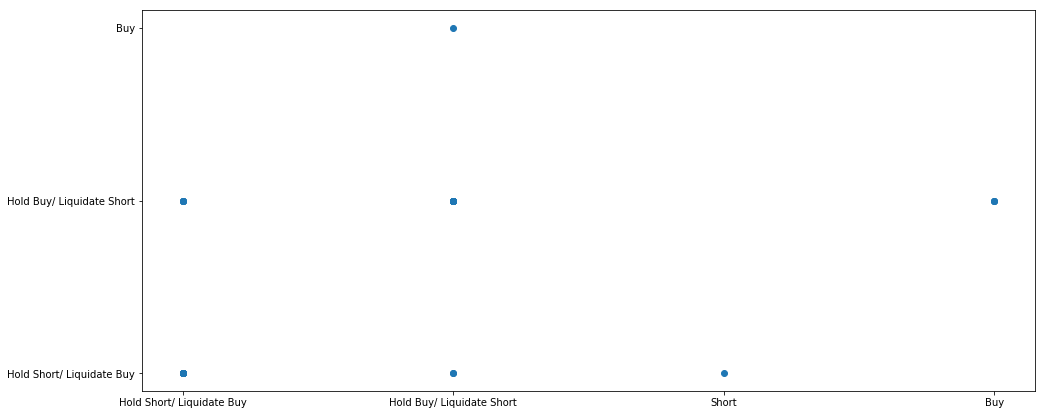

In [9]:
Y_pred = classifier.predict(X_test)
plt.figure(figsize=(16, 7))
plt.scatter(Y_test, Y_pred)
plt.show()

In [17]:
check = [Y_test.values, Y_pred]
check = pd.DataFrame(check)
check = check.T
check.columns = ['Call', 'Prediction']

In [21]:
print('Call')
print(check.Call.value_counts())
print('--'*40)
print('Prediction')
print(check.Prediction.value_counts())

Call
Hold Buy/ Liquidate Short    69
Hold Short/ Liquidate Buy    48
Buy                           3
Short                         1
Name: Call, dtype: int64
--------------------------------------------------------------------------------
Prediction
Hold Buy/ Liquidate Short    74
Hold Short/ Liquidate Buy    46
Buy                           1
Name: Prediction, dtype: int64


In [19]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[ 0  3  0  0]
 [ 1 66  2  0]
 [ 0  5 43  0]
 [ 0  0  1  0]]


<Figure size 432x288 with 0 Axes>

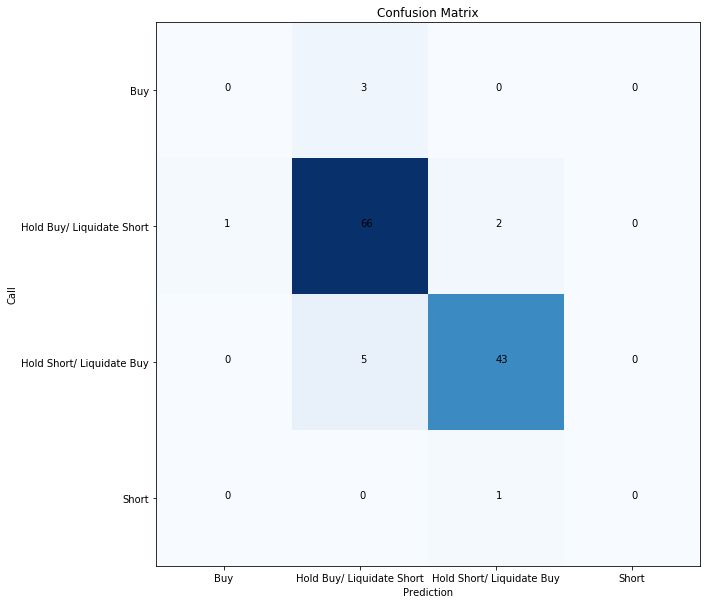

In [20]:
plt.clf()
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap = plt.cm.Blues)
classNames = ['Buy', 'Hold Buy/ Liquidate Short', 'Hold Short/ Liquidate Buy', 'Short']

plt.title('Confusion Matrix')
plt.ylabel('Call')
plt.xlabel('Prediction')

tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)

for i in range(4):
    for j in range(4):
        plt.text(j, i, str(cm[i][j]))
plt.show()

In [22]:
# accuracy using score meathod
# score function ultimately calls accuracy_score() function only

classifier.score(X_test, Y_test)

0.9008264462809917

In [23]:
# finding accuracy the mannual way
f = 0

for i in np.arange(len(Y_test)):
    if check.iloc[i, 0]!=check.iloc[i, 1]:
        f=f+1
print(f)

accuracy = (Y_test.size - f)/Y_test.size
print('The accuracy is found to be ',accuracy)

12
The accuracy is found to be  0.9008264462809917


### Query 4.1c
Import another stock data and create the bollinger columns. Using the already defined model, predict the daily calls for this new stock.

In [24]:
voltas = pd.read_csv('VOLTAS.csv')

def bbands(price, length=14, numsd=2):
    ave = price.rolling(length).mean()
    sd  = price.rolling(length).std()
    upband = ave + (sd*numsd)
    dnband = ave - (sd*numsd)
    return np.round(ave, 3), np.round(upband, 3), np.round(dnband, 3)

voltas['ave'], voltas['upper'], voltas['lower'] = bbands(voltas['Close Price'])

voltas.dropna(inplace = True)
voltas.reset_index(inplace=True)

print(voltas.columns)

Index(['index', 'Symbol', 'Series', 'Date', 'Prev Close', 'Open Price',
       'High Price', 'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty',
       '% Dly Qt to Traded Qty', 'ave', 'upper', 'lower'],
      dtype='object')


In [25]:
voltas['Call'] = 0
for i in np.arange(voltas.ave.size):
    print (i)
    if voltas['Average Price'][i] >= voltas.upper[i]:
        voltas['Call'][i] = 'Short'
    elif voltas['Average Price'][i] <= voltas.lower[i]:
        voltas['Call'][i] = 'Buy'
    elif (voltas['Average Price'][i] > voltas.lower[i]) and (voltas['Average Price'][i] <= voltas.ave[i]):
        voltas['Call'][i] = 'Hold Buy/ Liquidate Short'
    elif (voltas['Average Price'][i] < voltas.upper[i]) and (voltas['Average Price'][i] >= voltas.ave[i]):
        voltas['Call'][i] = 'Hold Short/ Liquidate Buy'
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [26]:
voltas.Call.value_counts()

Hold Short/ Liquidate Buy    241
Hold Buy/ Liquidate Short    213
Short                         15
Buy                           12
Name: Call, dtype: int64

In [27]:
X_voltas = voltas[['Average Price', 'upper', 'lower', 'ave']]
Y_voltas = voltas['Call']

classifier.score(X_voltas, Y_voltas)

# model is probably overfit for previous stock
# will work on this later

0.501039501039501

### Query 4.2 

Now, we'll again utilize classification to make a trade call, and measure the efficiency of our trading algorithm over the past two years.

### Query 4.2a
Import the stock data file of your choice

In [61]:
mt = pd.read_csv('VOLTAS.csv')
mt.index = pd.DatetimeIndex(mt.Date)

mt['Day_Perc_Change'] = 100*mt['Close Price'].pct_change()
mt.iloc[0, -1]=0

### Query 4.2b
Define 4 new columns , whose values are:
- % change between Open and Close price for the day 
- % change between Low and High price for the day 
- 5 day rolling mean of the day to day % change in Close Price 
- 5 day rolling std of the day to day % change in Close Price

In [62]:
def make_new_columns(data):
    data['Open-Close'] = (data['Open Price']-data['Close Price'])/data['Open Price']
    data['High-Low']   = (data['High Price'] - data['Low Price'])/data['Low Price']
    data['ret_5'] = data['Day_Perc_Change'].rolling(5).mean()
    data['std_5'] = data['Day_Perc_Change'].rolling(5).std()
    data.dropna(inplace=True)
    return data

mt = make_new_columns(mt)

### Query 4.2c
Create a new column 'Action' whose values are: 
- 1 if next day's price(Close) is greater than present day's. 
- (-1) if next day's price(Close) is less than present day's. 

i.e. Action [ i ] = 1 if Close[ i+1 ] > Close[ i ] 

i.e. Action [ i ] = (-1) if Close[ i+1 ] < Close[ i ]


In [63]:
mt['Action'] = np.where(mt['Close Price'].shift(-1) > mt['Close Price'], 1, -1)

### Query 4.2d
Construct a classification model with the 4 new inputs and 'Action' as target

In [64]:
X = mt[['Open-Close', 'High-Low', 'std_5', 'ret_5']]

Y = mt['Action']

In [65]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25, random_state=42)

dataset_length = mt.shape[0]

split = int(dataset_length * 0.75)

print('split ',split)

X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]


print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

split  367
(367, 4) (367,)
(123, 4) (123,)


Why Random Split was not used?

This is time dependent data, so the final 'Strategic Returns' will make more sense if we have whole test data of contineues days. However, one will find similar results if random split was used.

In [66]:
clf = RandomForestClassifier()
model = clf.fit(X_train, Y_train)
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Query 4.2e
Check the accuracy of this model , also , plot the net cumulative returns (in %) if we were to follow this algorithmic model

In [67]:
print('The accuracy of model is ',model.score(X_test, Y_test)*100, '%')

The accuracy of model is  52.84552845528455 %


In [68]:
mt['Strategy Returns'] = mt['Day_Perc_Change'].shift(-1)*model.predict(X)

<Figure size 432x288 with 0 Axes>

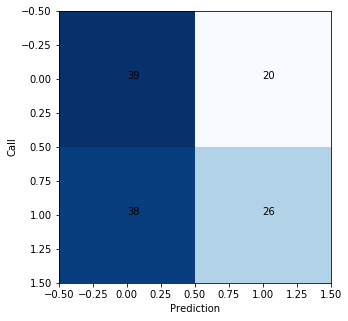

In [69]:
cm = confusion_matrix(Y_test, model.predict(X_test))
plt.clf()
plt.figure(figsize=(5, 5))
plt.imshow(cm, interpolation='nearest',  cmap=plt.cm.Blues)

plt.ylabel('Call')
plt.xlabel('Prediction')

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i][j]))
        
plt.show()

In [70]:
# precision = 
# recall    = 

report = classification_report(Y_test, model.predict(X_test))
print(report)

             precision    recall  f1-score   support

         -1       0.51      0.66      0.57        59
          1       0.57      0.41      0.47        64

avg / total       0.54      0.53      0.52       123



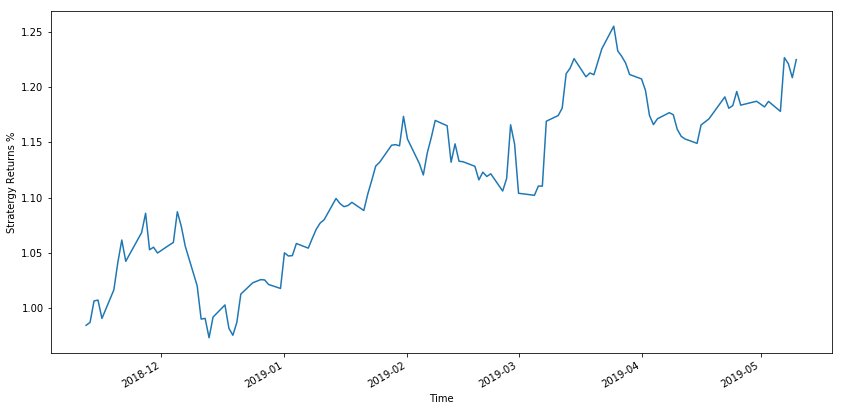

In [71]:
plt.figure(figsize=(14, 7))
((mt['Strategy Returns'][split:]+100)/100).cumprod().plot()
plt.ylabel('Stratergy Returns %')
plt.xlabel('Time')
plt.show()

This was a very basic model, but if we train more advanced model wit lot more data, we can get higher accuracy and better returns.

This graph precisely shows that algorithmic trading can become more viable as we improve our models.

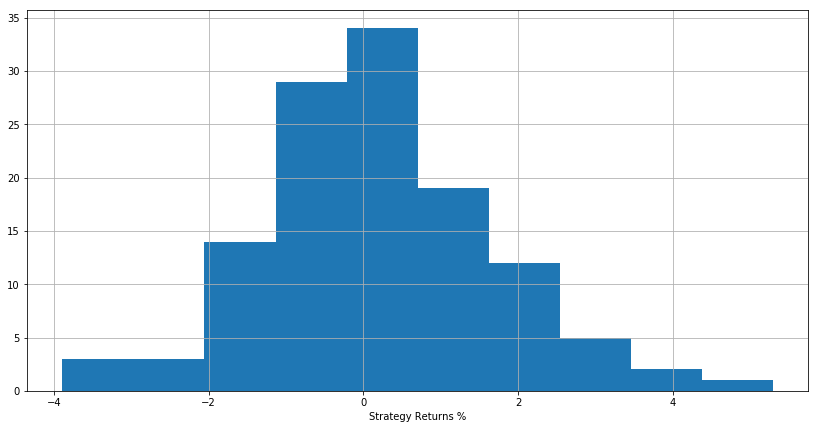

In [73]:
plt.figure(figsize=(14, 7))
mt['Strategy Returns'][split:].hist()
plt.xlabel('Strategy Returns %')
plt.show()

In [75]:
mt['Best Returns'] = mt['Day_Perc_Change'].shift(-1)*Y

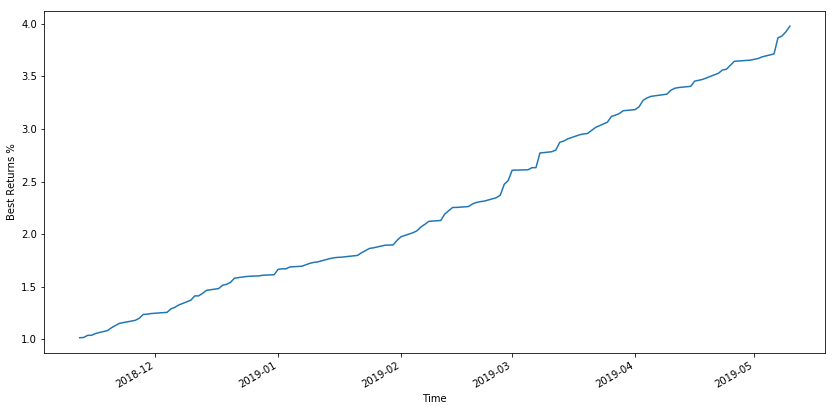

In [76]:
plt.figure(figsize=(14, 7))
((mt['Best Returns'][split:]+100)/100).cumprod().plot()
plt.ylabel('Best Returns %')
plt.xlabel('Time')
plt.show()

Sky is the limit.